# Stock Market Data Exploration
In this project, I’ll explore stock‑market index data for the NASDAQ.
I’ll start by inspecting the dataset, looking at daily price movements and volumes, and creating a few simple visualizations.
The goal is to understand how these major indices behave over time and to practice data‑exploration skills using Python.


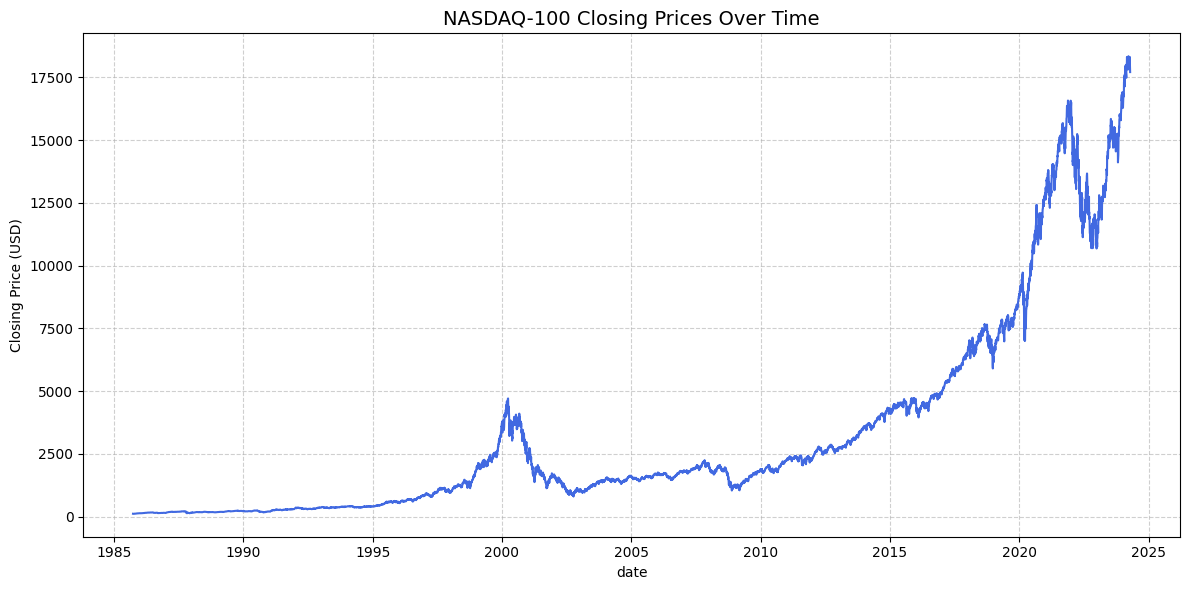

In [1]:
# Import libraries 
import os
import warnings
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/kaggle/input/sp500-nasdaq-spy-qqq-ohlcv-data/NASDAQ_100.csv')

# Let`s import `warnings` to have cleaner console
warnings.filterwarnings('ignore')

# Checking data for missing or duplicated values
data.isnull().sum()
data.duplicated().sum()
# =====================
# date              0 |
# open              0 |
# high              0 |
# low               0 |
# close             0 |
# volume            0 |
# change_percent    1 |
# avg_vol_20d       19|
# =====================
# 0                   |
# =====================

# Convert `date` column to datetime
data['date'] = pd.to_datetime(data['date'])

# Fill small number of missing values using forward and backward fill (last known value)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Next we will plot the `close` values over time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'], color='royalblue', linewidth=1.5)
plt.title('NASDAQ-100 Closing Prices Over Time', fontsize=14)
plt.xlabel('date')
plt.ylabel('Closing Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
sns.set_style("whitegrid")
plt.show()



*The NASDAQ‑100 shows strong long‑term growth with major dips around 2000, 2008, and 2020. Despite short‑term volatility, the overall trend remains upward.*

# **In the next step we will compute and plot the moving averages**

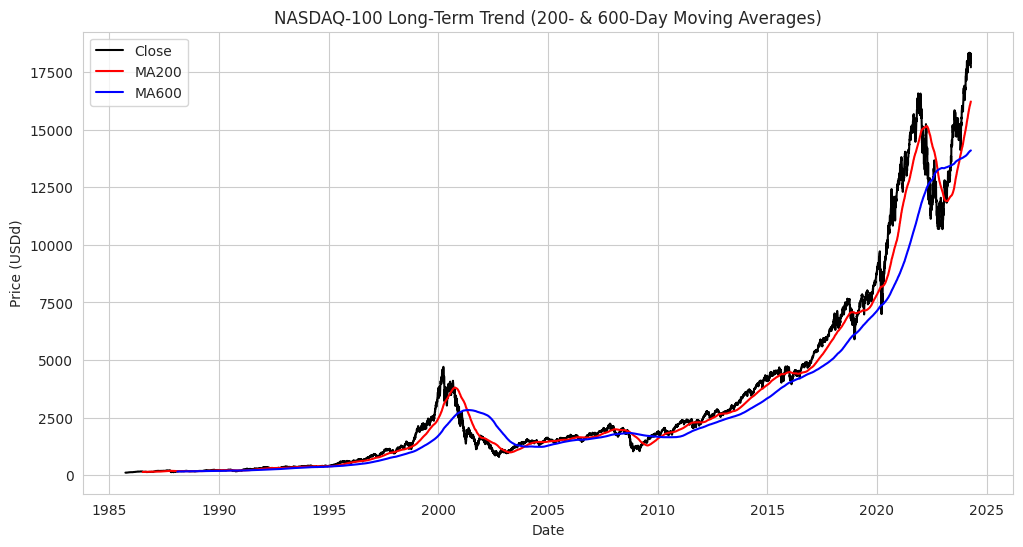

In [2]:
data['MA200'] = data['close'].rolling(window=200).mean()
data['MA600'] = data['close'].rolling(window=600).mean()


plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'], label='Close', color='black')
plt.plot(data['date'], data['MA200'], label='MA200', color='red')
plt.plot(data['date'], data['MA600'], label='MA600', color='blue')
plt.title('NASDAQ‑100 Long‑Term Trend (200‑ & 600‑Day Moving Averages)')
plt.xlabel('Date')
plt.ylabel('Price (USDd)')
sns.set_style("whitegrid")
plt.legend()
plt.show()

*The 200‑ and 600‑day moving averages highlight long‑term market cycles. Crossovers mark key trend shifts, separating bullish recoveries from bearish declines.*

# Volume & Price Analysis

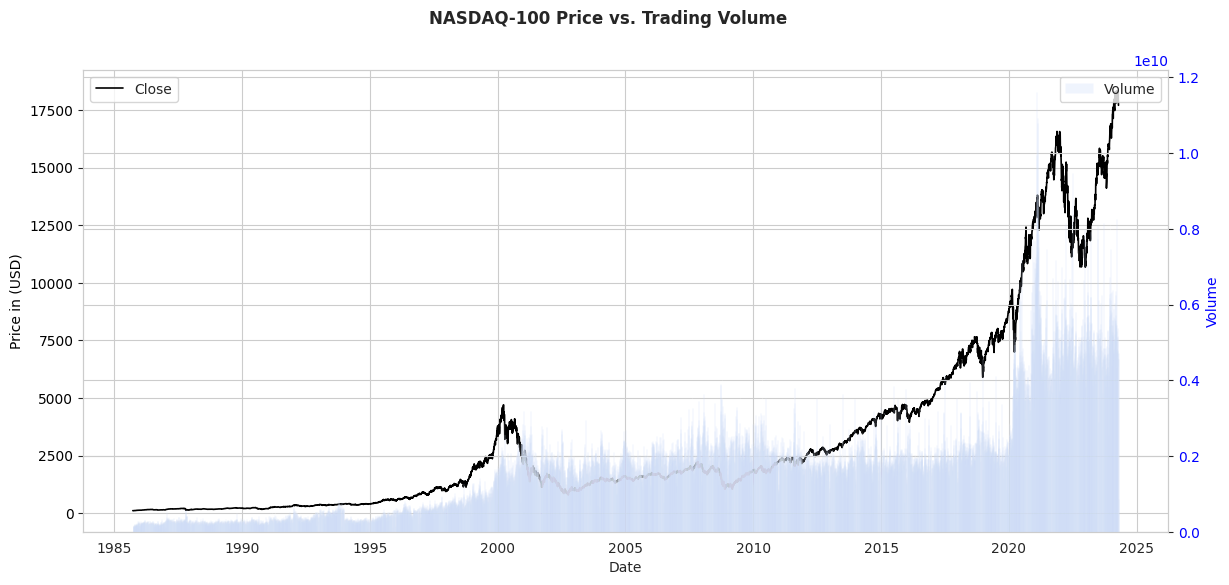

In [3]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Price on left axis
ax1.plot(data['date'], data['close'], color='black', label='Close', linewidth=1.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price in (USD)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Volume on right axis
ax2 = ax1.twinx()
ax2.bar(data['date'], data['volume'], color='cornflowerblue', alpha=0.1, label='Volume', width=10)
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Titles & legends
plt.suptitle('NASDAQ-100 Price vs. Trading Volume', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


*Volume surges around 2000, 2008, and 2020 reflect periods of panic or heavy trading. Sustained volume increases during uptrends suggest strong investor participation,confirming trend validity.*


##  Final Insights — NASDAQ‑100 Analysis

### Key Observations
The NASDAQ‑100 demonstrates strong long‑term growth driven by the technology and innovation sectors.  
Despite multiple downturns — the dot‑com crash (2000 – 2002), the financial crisis (2008 – 2009), and the COVID‑19 shock (2020) —  
the index consistently recovered and pushed to new highs.  

This resilience underscores how tech stocks act as engines of modern market expansion while also amplifying short‑term volatility.

### Moving Averages
The 200‑day and 600‑day moving averages highlight long‑term momentum and cyclical market shifts.  
When the 200‑day line stays above the 600‑day, the market tends to remain in an extended bullish phase.  
Conversely, when the 200‑day average crosses below the 600‑day, it often marks the start of a bearish period.  

These crossovers serve as simple yet effective indicators of structural trend changes in the NASDAQ‑100.

### Volume and Volatility
Trading volume tends to surge during periods of high uncertainty and sharp price movement.  
Notable spikes appear around market corrections and crisis periods, when investors rapidly rebalance portfolios.  
These bursts of activity often coincide with short‑term volatility and can mark key points of sentiment reversal.  

Overall, volume acts as a confirmation tool — reinforcing whether strong price moves reflect real market conviction or temporary noise.

### Summary
The NASDAQ‑100’s long‑term growth reflects the expansion of technology and innovation as drivers of modern markets.  
While cyclical downturns create temporary volatility, the broader trajectory remains positive.  
Moving‑average signals provide useful visual cues for tracking momentum shifts, and volume spikes reveal moments of market stress or renewed participation.  

Together, these indicators show how the NASDAQ‑100 evolves through cycles of optimism and correction, yet continues to demonstrate resilience across decades.